In [1]:
from fastai.vision.all import *
from fastbook import *

In [2]:
path = Path('images')

In [22]:
bear_types = ['black', 'grizzly', 'polar']
for bear in bear_types:
    dest = (path/bear)
    dest.mkdir(exist_ok=True)
    urls = search_images_ddg(f'{bear} bear')
    download_images(dest, urls=urls)


In [3]:
fns = get_image_files(path)
failed = verify_images(fns)
failed.map(Path.unlink)

(#0) []

In [4]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [5]:
dls = bears.dataloaders(path)

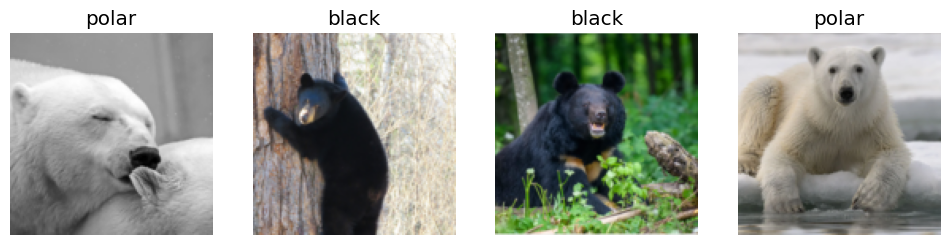

In [6]:
dls.valid.show_batch(max_n=4, nrows=1)

In [7]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms(),
    )
dls = bears.dataloaders(path, device='cuda')

In [8]:
learn = vision_learner(dls, resnet18,  metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.503747,0.362769,0.076923,00:34


c:\Users\faraz\anaconda3\envs\MachineLearning\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
c:\Users\faraz\anaconda3\envs\MachineLearning\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


epoch,train_loss,valid_loss,error_rate,time
0,0.354710,0.277636,0.076923,00:25
1,0.285253,0.237934,0.048077,00:23
2,0.238081,0.231828,0.048077,00:24
3,0.216460,0.225973,0.048077,00:23


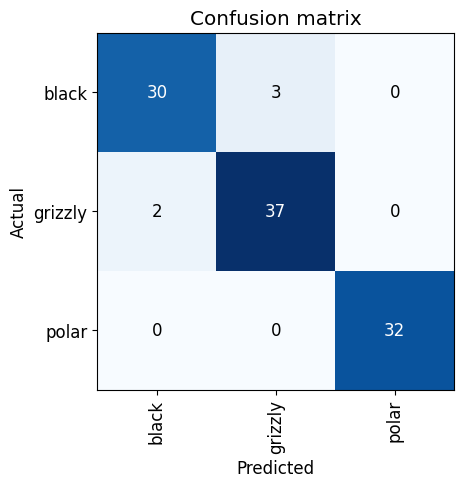

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

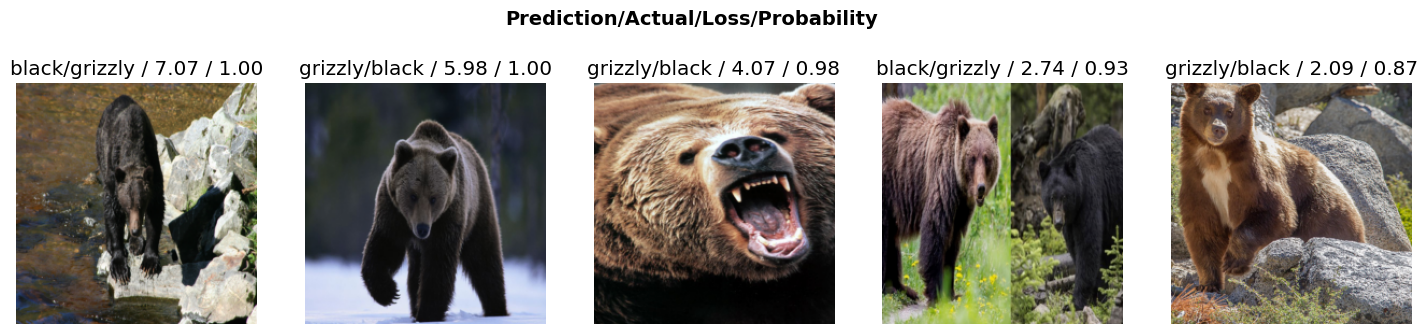

In [10]:
interp.plot_top_losses(5, nrows=1, figsize=(18, 4))

In [11]:
from fastai.vision.widgets import ImageClassifierCleaner

cleaner = ImageClassifierCleaner(learn)
cleaner

c:\Users\faraz\anaconda3\envs\MachineLearning\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [12]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [13]:
learn.export('BearClassifier.pkl')